In [96]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import sympy
import numpy as np



from shapely.geometry import Polygon

In [2]:
%%bash
cd assets/border/Hyogo
pwd

/home/jovyan/assets/border/Hyogo


# 国土数値情報ダウンロードサービス > 行政区域データ

https://nlftp.mlit.go.jp/ksj/jpgis/datalist/KsjTmplt-N03.html

## 兵庫県の市町村境界データ

In [3]:
gdf_hyogo = gpd.read_file("./assets/border/Hyogo/N03-19_28_190101.shp")
display(gdf_hyogo)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,兵庫県,None,神戸市,東灘区,28101,"POLYGON ((135.28019 34.65135, 135.27681 34.651..."
1,兵庫県,None,神戸市,東灘区,28101,"POLYGON ((135.25423 34.66918, 135.25394 34.668..."
2,兵庫県,None,神戸市,東灘区,28101,"POLYGON ((135.27054 34.67930, 135.27032 34.679..."
3,兵庫県,None,神戸市,東灘区,28101,"POLYGON ((135.28140 34.69730, 135.28142 34.697..."
4,兵庫県,None,神戸市,東灘区,28101,"POLYGON ((135.30395 34.70998, 135.30397 34.709..."
...,...,...,...,...,...,...
2179,兵庫県,None,美方郡,新温泉町,28586,"POLYGON ((134.50283 35.66286, 134.50288 35.662..."
2180,兵庫県,None,美方郡,新温泉町,28586,"POLYGON ((134.50303 35.66310, 134.50303 35.663..."
2181,兵庫県,None,美方郡,新温泉町,28586,"POLYGON ((134.51707 35.66411, 134.51704 35.664..."
2182,兵庫県,None,美方郡,新温泉町,28586,"POLYGON ((134.51750 35.66579, 134.51752 35.665..."


In [4]:
gdf_hyogo.columns

Index(['N03_001', 'N03_002', 'N03_003', 'N03_004', 'N03_007', 'geometry'], dtype='object')

In [5]:
print(gdf_hyogo['N03_001'].unique(), '\n')
print(gdf_hyogo['N03_002'].unique(), '\n')
print(gdf_hyogo['N03_003'].unique(), '\n')
print(gdf_hyogo['N03_004'].unique(), '\n')
print(gdf_hyogo['N03_007'].unique(), '\n')

['兵庫県'] 

[None] 

['神戸市' None '川辺郡' '多可郡' '加古郡' '神崎郡' '揖保郡' '赤穂郡' '佐用郡' '美方郡'] 

['東灘区' '灘区' '兵庫区' '長田区' '須磨区' '垂水区' '北区' '中央区' '西区' '姫路市' '尼崎市' '明石市'
 '西宮市' '洲本市' '芦屋市' '伊丹市' '相生市' '豊岡市' '加古川市' '赤穂市' '西脇市' '宝塚市' '三木市' '高砂市'
 '川西市' '小野市' '三田市' '加西市' '篠山市' '養父市' '丹波市' '南あわじ市' '朝来市' '淡路市' '宍粟市' '加東市'
 'たつの市' '猪名川町' '多可町' '稲美町' '播磨町' '市川町' '福崎町' '神河町' '太子町' '上郡町' '佐用町' '香美町'
 '新温泉町'] 

['28101' '28102' '28105' '28106' '28107' '28108' '28109' '28110' '28111'
 '28201' '28202' '28203' '28204' '28205' '28206' '28207' '28208' '28209'
 '28210' '28212' '28213' '28214' '28215' '28216' '28217' '28218' '28219'
 '28220' '28221' '28222' '28223' '28224' '28225' '28226' '28227' '28228'
 '28229' '28301' '28365' '28381' '28382' '28442' '28443' '28446' '28464'
 '28481' '28501' '28585' '28586'] 



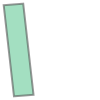

In [6]:
gdf_hyogo[gdf_hyogo["N03_004"] == '灘区']['geometry'].iloc[10]

↑これは、境界を可視化したもの？？？

行政区域データだと、区までしかない。
それより細かい町の単位は、Polygon情報としてはあるが、名称がない。

# e-Stat 国勢調査　小地域

https://www.e-stat.go.jp/gis/statmap-search?page=1&type=2&aggregateUnitForBoundary=A&toukeiCode=00200521

参考：[国勢調査町丁・字等別境界データセット | Geoshapeリポジトリ](https://geoshape.ex.nii.ac.jp/ka/)

こっちならありそう。

In [7]:
%%bash
cd assets/border/Hyogo/Chuo
ls

B002005212020DDSWC28110.zip
r2kb28110.dbf
r2kb28110.prj
r2kb28110.shp
r2kb28110.shx


## 灘区の境界データ

In [8]:
gdf_hyogo_kobe_nada = gpd.read_file("./assets/border/Hyogo/Nada/r2kb28102.shp")
gdf_hyogo_kobe_nada.head(2)

,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
0,281020001101,28,102,043005020,0001101,兵庫県,神戸市灘区,下河原通五丁目,None,8101,...,1020001-1-01,18,10,28,102,135.231086,34.710639,0430-05020,1-1- 1,"POLYGON ((135.23126 34.71082, 135.23127 34.710..."
1,281020001102,28,102,043004040,0001102,兵庫県,神戸市灘区,下河原通四丁目,None,8101,...,1020001-1-02,56,30,28,102,135.231764,34.710687,0430-04040,1-1- 2,"POLYGON ((135.23220 34.71078, 135.23222 34.710..."


In [9]:
for col in gdf_hyogo_kobe_nada.columns.values:
    print(col)
    print(gdf_hyogo_kobe_nada[col].unique(), '\n')

KEY_CODE
['281020001101' '281020001102' '281020001103' ... '2810212463'
 '2810212479' '2810212484'] 

PREF
['28'] 

CITY
['102'] 

K_AREA
['043005020' '043004040' '043004050' ... '084000010' '067000010'
 '999000010'] 

S_AREA
['0001101' '0001102' '0001103' ... '12463' '12479' '12484'] 

PREF_NAME
['兵庫県'] 

CITY_NAME
['神戸市灘区'] 

S_NAME
['下河原通五丁目' '下河原通四丁目' '下河原通三丁目' '下河原通一丁目' '下河原通二丁目' '琵琶町三丁目' '琵琶町二丁目'
 '琵琶町一丁目' '備後町五丁目' '深田町四丁目' '備後町四丁目' '桜口町四丁目' '桜口町五丁目' '深田町三丁目' '深田町二丁目'
 '深田町一丁目' '中郷町五丁目' '備後町一丁目' '大和町五丁目' '大和町四丁目' '大和町三丁目' '大和町一丁目' '大和町二丁目'
 '中郷町一丁目' '中郷町二丁目' '中郷町三丁目' '中郷町四丁目' '備後町二丁目' '備後町三丁目' '桜口町三丁目' '桜口町二丁目'
 '桜口町一丁目' '徳井町五丁目' '徳井町四丁目' '徳井町三丁目' '徳井町二丁目' '徳井町一丁目' '友田町三丁目' '友田町二丁目'
 '友田町一丁目' '記田町五丁目' '記田町四丁目' '記田町三丁目' '記田町二丁目' '記田町一丁目' '浜田町三丁目' '浜田町二丁目'
 '鹿ノ下通三丁目' '大石東町六丁目' '鹿ノ下通二丁目' '大石東町五丁目' '鹿ノ下通一丁目' '烏帽子町三丁目' '大石東町三丁目'
 '大石東町四丁目' '烏帽子町二丁目' '大石東町二丁目' '烏帽子町一丁目' '新在家北町二丁目' '友田町五丁目' '友田町四丁目'
 '新在家北町一丁目' '大石東町一丁目' '大石南町二丁目' '大石南町三丁目' '味泥町' '大石南町一丁目' '新在家南町五丁目'
 '新在家南町四丁目' '新在家南町三

## 中央区の境界データ

In [70]:
gdf_hyogo_kobe_chuo = gpd.read_file("./assets/border/Hyogo/Chuo/r2kb28110.shp")
gdf_hyogo_kobe_chuo.head(2)

,KEY_CODE,PREF,CITY,K_AREA,S_AREA,PREF_NAME,CITY_NAME,S_NAME,KIGO_E,HCODE,...,KEYCODE1,JINKO,SETAI,KEN_OLD,CITY_OLD,X_CODE,Y_CODE,KCODE1,CCODE1,geometry
0,281100001101,28,110,027004060,0001101,兵庫県,神戸市中央区,琴ノ緒町四丁目,None,8101,...,1100001-1-01,47,29,28,110,135.195601,34.697033,0270-04060,1-1- 1,"POLYGON ((135.19564 34.69729, 135.19588 34.696..."
1,281100001102,28,110,027004070,0001102,兵庫県,神戸市中央区,琴ノ緒町四丁目,None,8101,...,1100001-1-02,36,26,28,110,135.195201,34.696869,0270-04070,1-1- 2,"POLYGON ((135.19556 34.69678, 135.19538 34.696..."


In [71]:
# ポートアイランドの町丁一覧
gdf_hyogo_kobe_chuo[gdf_hyogo_kobe_chuo['S_NAME'].str.contains('港島')]['S_NAME'].unique()

array(['港島一丁目', '港島二丁目', '港島三丁目', '港島四丁目', '港島五丁目', '港島六丁目', '港島七丁目',
       '港島八丁目', '港島九丁目', '港島中町一丁目', '港島中町二丁目', '港島中町四丁目', '港島中町五丁目',
       '港島南町一丁目', '港島南町二丁目', '港島南町三丁目', '港島南町四丁目', '港島南町五丁目', '港島南町六丁目',
       '港島南町七丁目', '港島中町六丁目', '港島中町七丁目', '港島中町八丁目', '港島中町三丁目'],
      dtype=object)

In [72]:
gdf_hyogo_kobe_chuo[gdf_hyogo_kobe_chuo['S_NAME']=='港島一丁目']

for col in gdf_hyogo_kobe_chuo.columns.values:
    print(col)
    print(gdf_hyogo_kobe_chuo[gdf_hyogo_kobe_chuo['S_NAME']=='港島一丁目'][col].unique(), '\n')

KEY_CODE
['281101411301' '2811014121' '2811014131' '2811014141' '2811014151'
 '2811014161' '2811014171' '2811014181' '2811014191' '2811014201'
 '2811014211' '2811014221'] 

PREF
['28'] 

CITY
['110'] 

K_AREA
['065001010'] 

S_AREA
['1411301' '14121' '14131' '14141' '14151' '14161' '14171' '14181' '14191'
 '14201' '14211' '14221'] 

PREF_NAME
['兵庫県'] 

CITY_NAME
['神戸市中央区'] 

S_NAME
['港島一丁目'] 

KIGO_E
[None] 

HCODE
[8101] 

AREA
[7.40669763e+05 1.03325400e+03 2.01883400e+03 1.18049900e+03
 4.50793000e+02 3.43006000e+02 3.31766000e+02 6.34340000e+02
 5.05792000e+02 4.80497000e+02 8.34379000e+02 9.69815000e+02] 

PERIMETER
[5089.036  129.478  216.338  149.968   87.015   78.681   77.661  100.791
   90.742   88.653  136.294  160.32 ] 

KIHON1
['0650'] 

DUMMY1
['-'] 

KIHON2
['01'] 

KIHON3
['010'] 

C1
[22] 

C2
[1411 1412 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422] 

DUMMY2
['-'] 

C3
[3 1] 

DUMMY3
['-' None] 

C4
[1 0] 

KIGO_A
[None 'BE' 'BF' 'BG' 'BC' 'BD' 'A6'] 

KIGO_D
[None

In [73]:
gdf_hyogo_kobe_chuo[gdf_hyogo_kobe_chuo['S_NAME']=='港島一丁目']['geometry']

2439    POLYGON ((135.20702 34.67184, 135.20745 34.666...
2460    POLYGON ((135.20251 34.67233, 135.20220 34.672...
2461    POLYGON ((135.20243 34.67199, 135.20240 34.671...
2462    POLYGON ((135.20233 34.67184, 135.20240 34.671...
2463    POLYGON ((135.20331 34.67261, 135.20302 34.672...
2464    POLYGON ((135.20332 34.67249, 135.20303 34.672...
2465    POLYGON ((135.20332 34.67238, 135.20304 34.672...
2466    POLYGON ((135.20334 34.67216, 135.20306 34.672...
2467    POLYGON ((135.20335 34.67198, 135.20307 34.671...
2468    POLYGON ((135.20307 34.67197, 135.20335 34.671...
2469    POLYGON ((135.20433 34.67180, 135.20433 34.671...
2470    POLYGON ((135.20433 34.67180, 135.20362 34.671...
Name: geometry, dtype: geometry

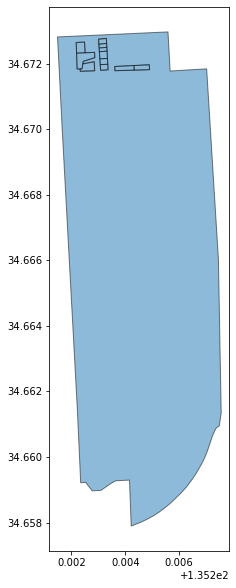

In [74]:
pisland_1_geo= gdf_hyogo_kobe_chuo[gdf_hyogo_kobe_chuo['S_NAME']=='港島一丁目']['geometry']
ax = pisland_1_geo.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

↑変な図形が内側に、11個入っている。

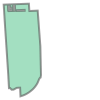

In [75]:
pisland_1_geo.values[0]

↑12個あるうちの最初のPolygonだけを出力しても、内部に変な形が見られる。

In [76]:
print(pisland_1_geo.values[0])

POLYGON ((135.20701812107163 34.67183872468679, 135.20745359591865 34.66603681892329, 135.20755698535595 34.661341609787485, 135.20748465580624 34.660947731705775, 135.20739690721248 34.66090328791278, 135.2073500450664 34.660856296740626, 135.2072444405931 34.660669997911356, 135.20704008911505 34.660171143462236, 135.20694537178642 34.65998251248291, 135.20683981670166 34.65980072030863, 135.20663491981023 34.65950920952204, 135.20647190371076 34.659309799682816, 135.2062897501269 34.659106019474855, 135.20607494111164 34.65890923425358, 135.20571186781441 34.65861885596697, 135.20550581041255 34.65847609582594, 135.2052806865566 34.65833572562624, 135.2050584796798 34.65821336372705, 135.20484473858383 34.65811798522347, 135.204603701908 34.65802054803772, 135.20422054239933 34.657894829267846, 135.20415613011468 34.65929709297478, 135.20364314061877 34.65927597162429, 135.20343755660997 34.659178278646166, 135.20310005009333 34.65898461894852, 135.20277531551912 34.65896890955717, 

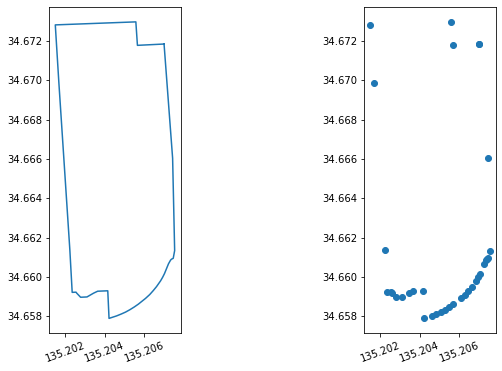

In [77]:
x,y = pisland_1_geo.values[0].exterior.xy

fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(1,3,1)
ax1.plot(x,y)

ax2 = fig.add_subplot(1,3,3)
ax2.scatter(x, y)


# X軸の数字をオフセットを使わずに表現する
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
ax2.get_xaxis().get_major_formatter().set_useOffset(False)

ax1.tick_params(axis="x", rotation=20)
ax2.tick_params(axis="x", rotation=20)

↑しかし、matplot で出力すると、内部の変な形は見えない。（この方法で可視化すべし。）

### 港島のデータを用いて、ある点がの対象地域における内外判定を行う。

[内外判定のロジック]  
- ある点から横に直線Aを引く。
- Max（境界座標間の垂直距離） ÷2 +1 の幅を持って、直線Aから対象の境界座標群をpick up.
- 各境界座標毎に、その次の境界座標と線を結ぶ。
    -　元データがおそらく、時計回り or 半時計周りにデータが並んでいるので、元のデータ配列的に"両隣" & "次"。
    - この結ぶ線は、右周りに結んでも、左回りに結んでも変わらない。
- 各線と、直線Aが交差しているかを判定する。
- その本数によって、内外判定を行う。


- ある点から縦に直線を引く。
- 以下、同文。



[データ上の注意]：
- x座標、y座標共に、配列の最初の値と最後の値が同じ座標を示している。

135.20536577421848 34.660671329927396


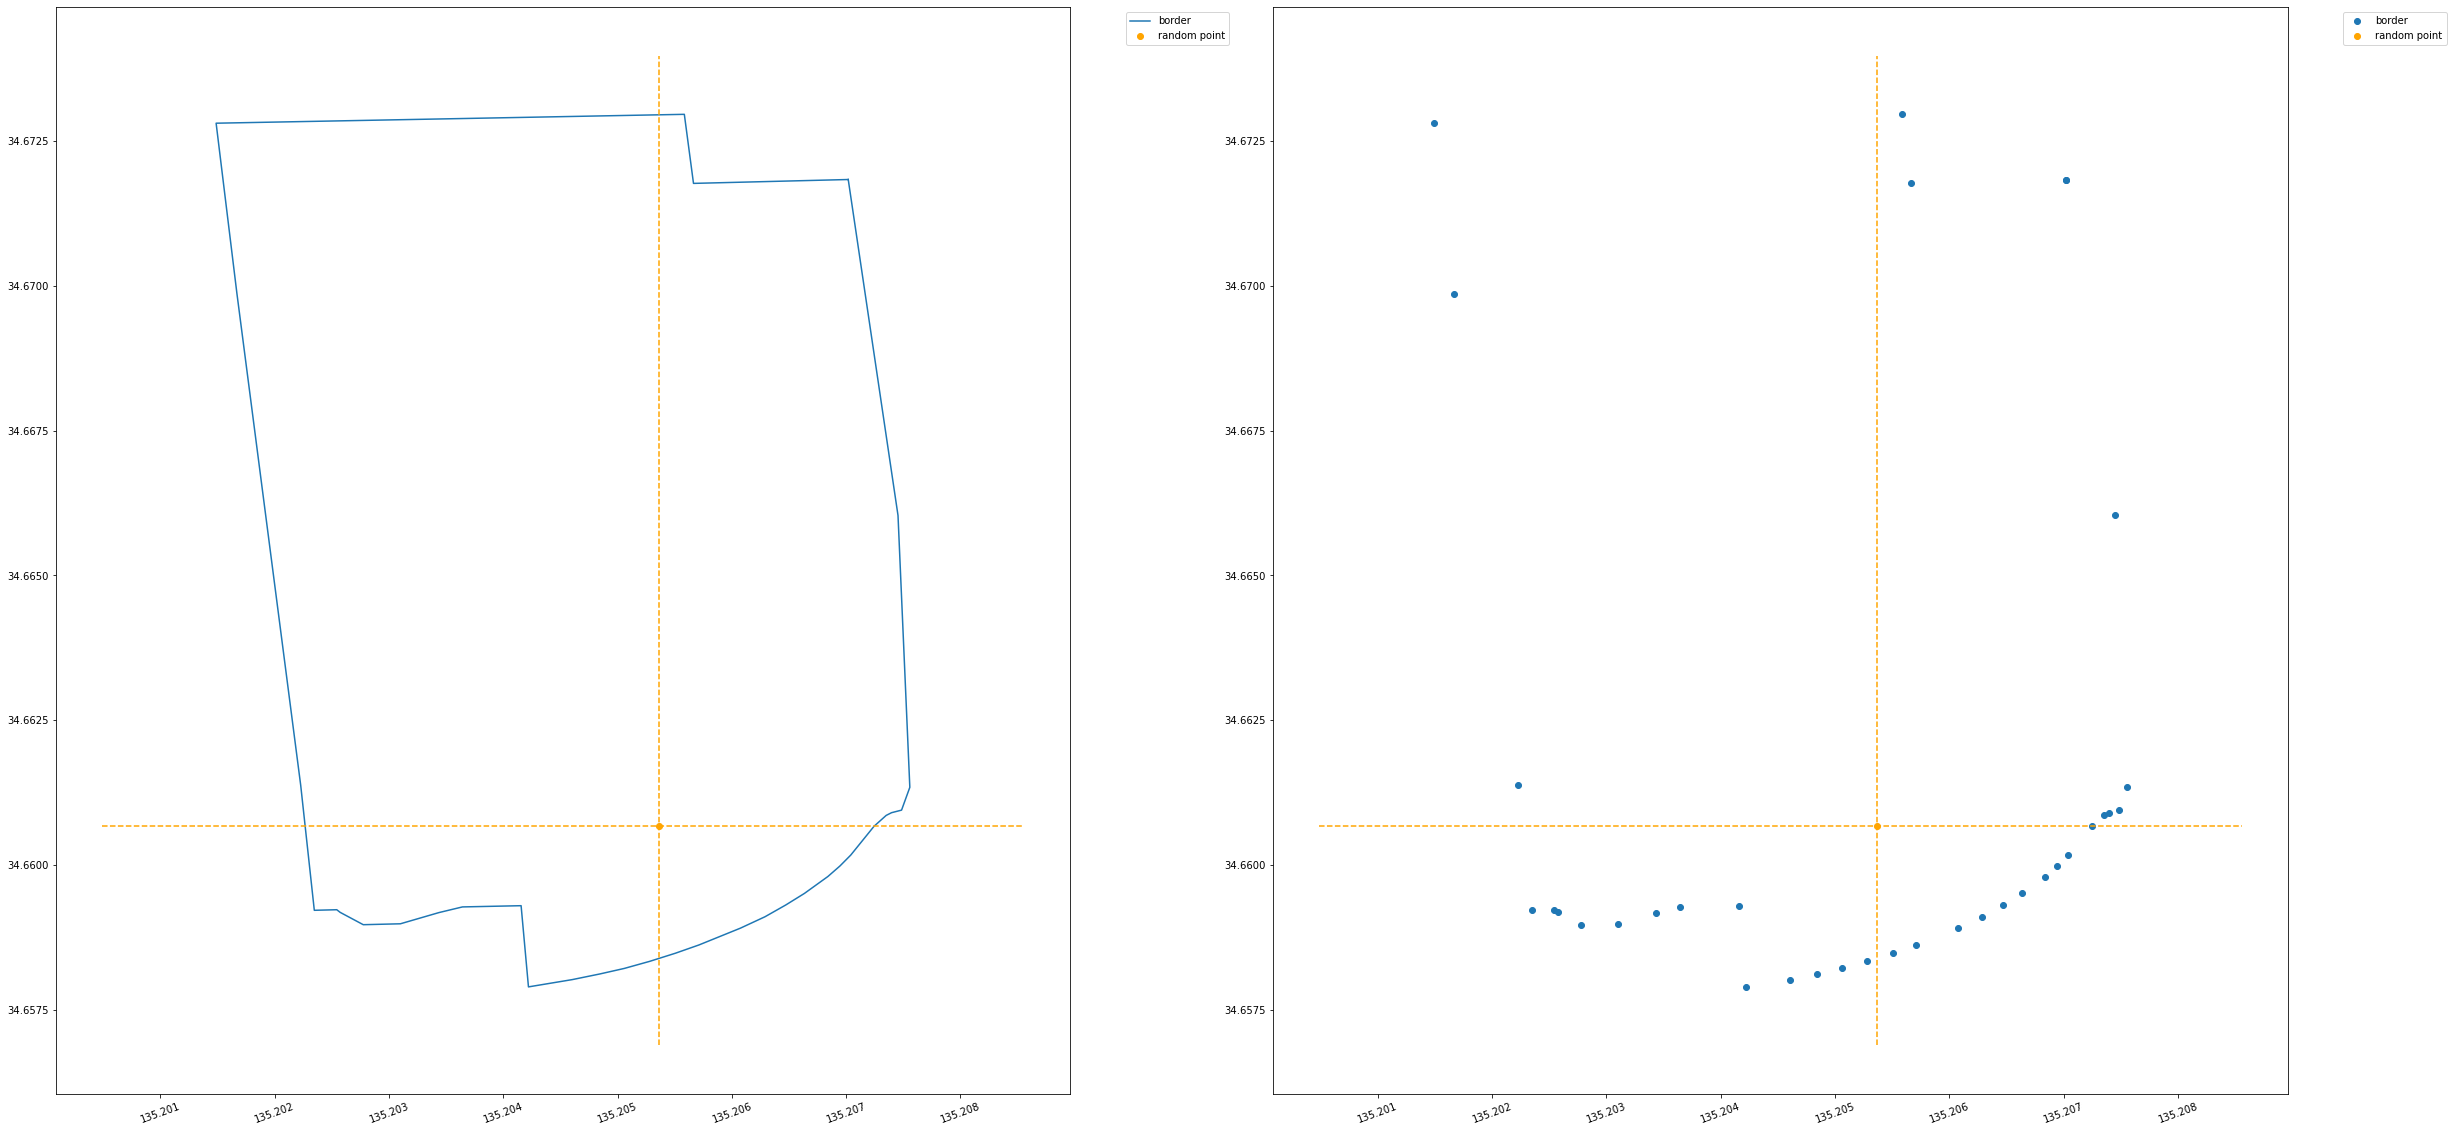

In [145]:
def random_float_between2(start, end):
    v = random.uniform(start, end)
    return v



# get a random coordinate.
random_x = random_float_between2(min(x), max(x))
random_y = random_float_between2(min(y), max(y))


print(random_x, random_y)


x,y = pisland_1_geo.values[0].exterior.xy
fig = plt.figure(figsize=(40, 20))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,y, label="border")
ax1.scatter(random_x, random_y, color="orange", label="random point")
ax1.hlines(random_y, min(x)-0.001, max(x)+0.001, color="orange", linestyles="dashed")
ax1.vlines(random_x, min(y)-0.001, max(y)+0.001, color="orange", linestyles="dashed")
ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(x, y, label="border")
ax2.scatter(random_x, random_y, color="orange", label="random point")
ax2.hlines(random_y, min(x)-0.001, max(x)+0.001, color="orange", linestyles="dashed")
ax2.vlines(random_x, min(y)-0.001, max(y)+0.001, color="orange", linestyles="dashed")
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# X軸の数字をオフセットを使わずに表現する
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
ax2.get_xaxis().get_major_formatter().set_useOffset(False)

ax1.tick_params(axis="x", rotation=20)
ax2.tick_params(axis="x", rotation=20)

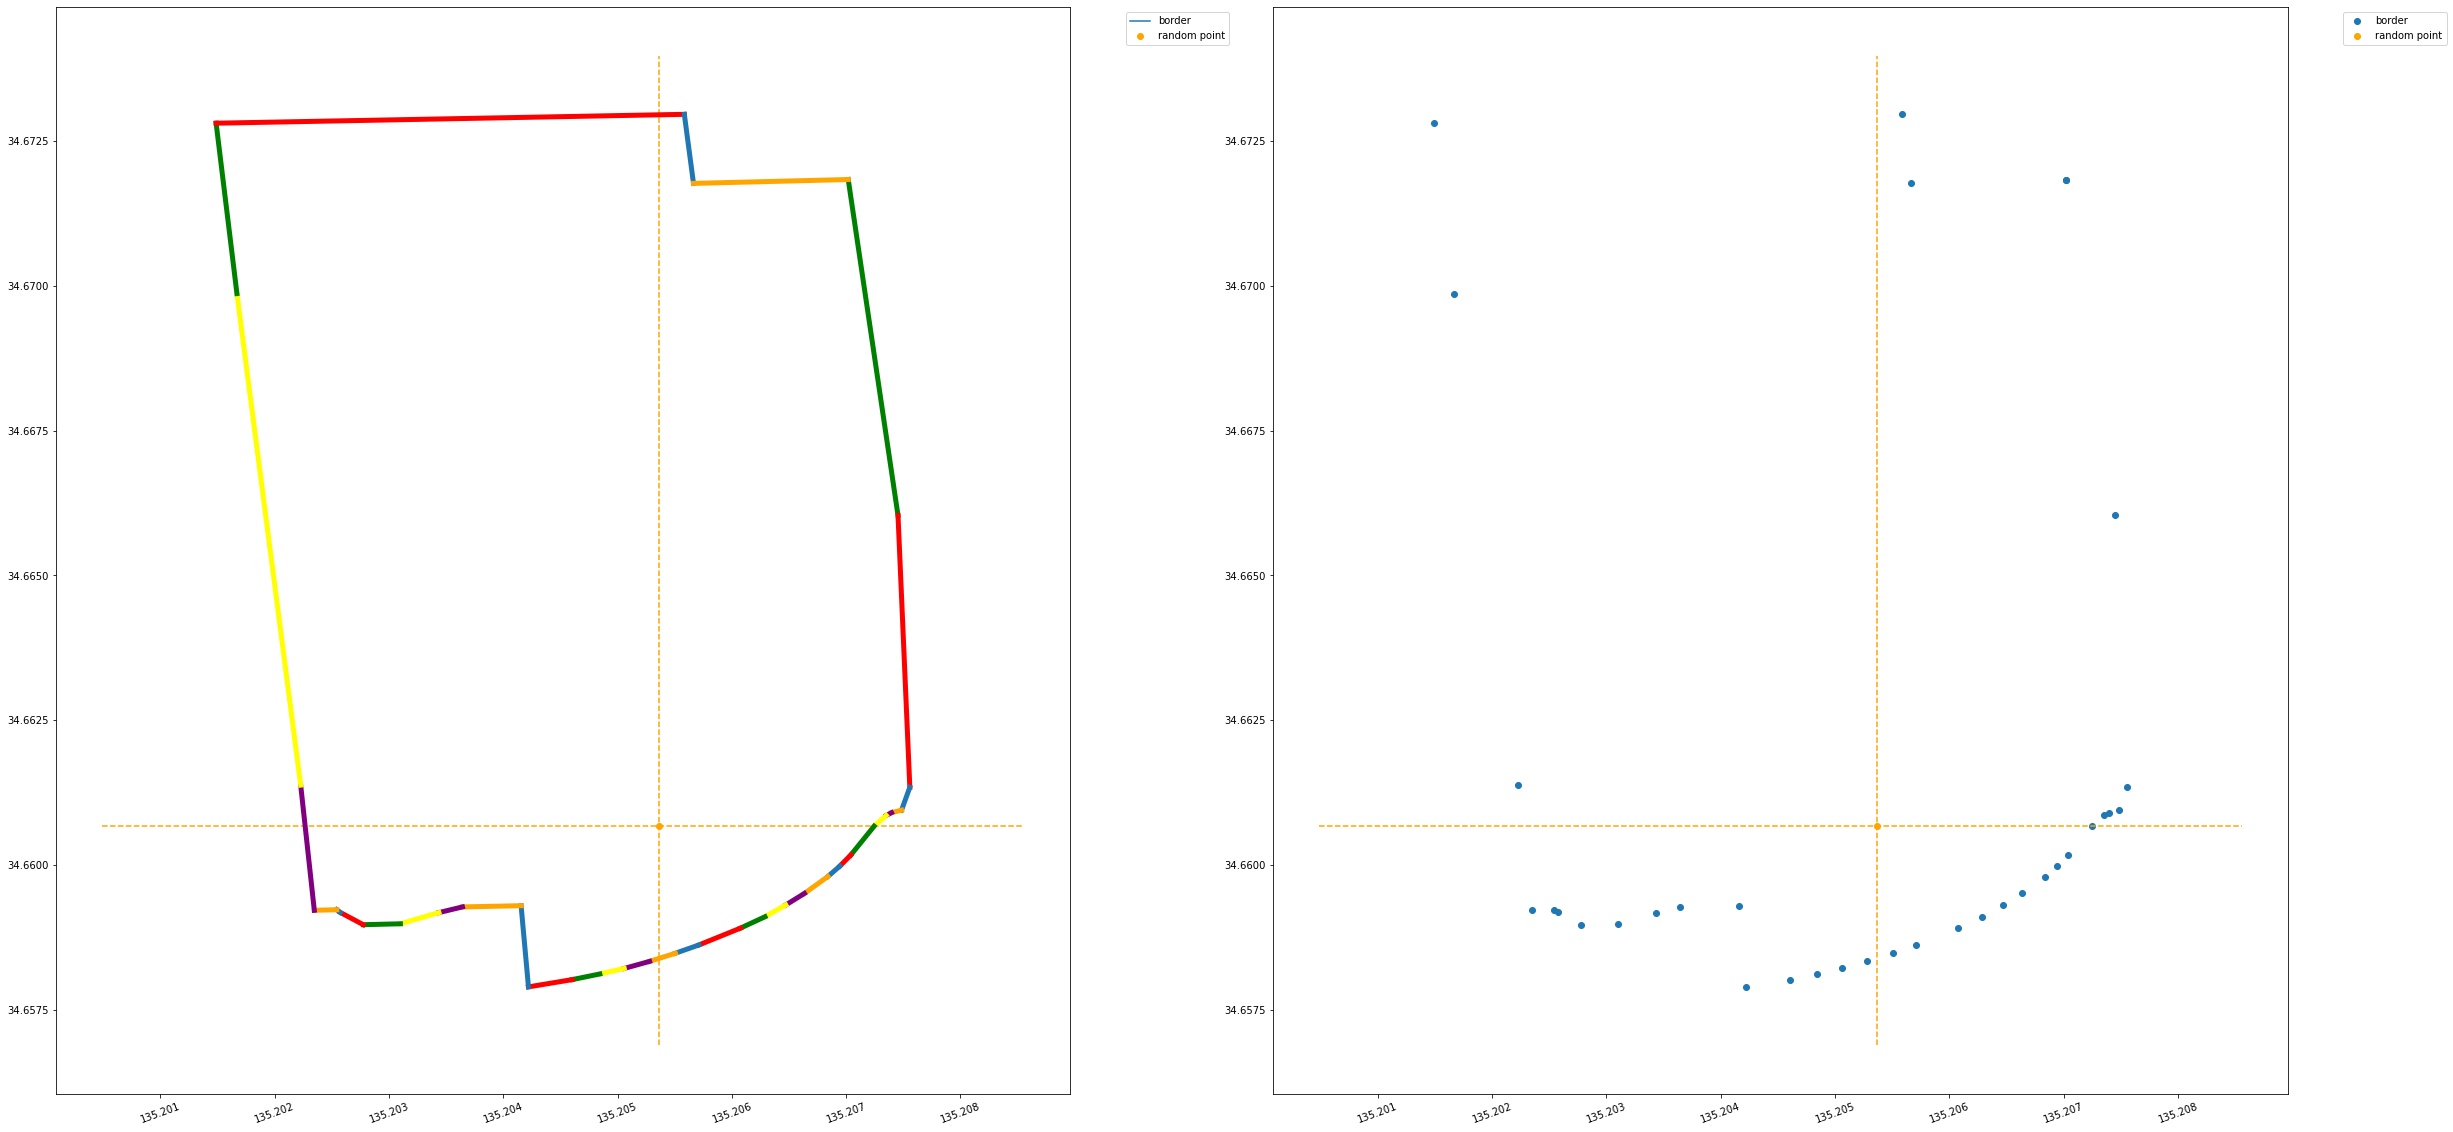

In [146]:
# 以下、 random_x, random_y の値を上記と同じにする。

colors = ["green", "red", "tab:blue", "orange", "purple", "yellow", "pink"]

x,y = pisland_1_geo.values[0].exterior.xy
fig = plt.figure(figsize=(40, 20))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,y, label="border")
ax1.scatter(random_x, random_y, color="orange", label="random point")   
ax1.hlines(random_y, min(x)-0.001, max(x)+0.001, color="orange", linestyles="dashed")
ax1.vlines(random_x, min(y)-0.001, max(y)+0.001, color="orange", linestyles="dashed")

for index in range(0, len(x)-1):
    color_index = index % (len(colors)-1)
    color = colors[color_index]
    ax1.plot([x[index], x[index+1]], [y[index], y[index+1]], linewidth=5, color=color)

ax1.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')


ax2 = fig.add_subplot(1,2,2)
ax2.scatter(x, y, label="border")
ax2.scatter(random_x, random_y, color="orange", label="random point")
ax2.hlines(random_y, min(x)-0.001, max(x)+0.001, color="orange", linestyles="dashed")
ax2.vlines(random_x, min(y)-0.001, max(y)+0.001, color="orange", linestyles="dashed")
ax2.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# X軸の数字をオフセットを使わずに表現する
ax1.get_xaxis().get_major_formatter().set_useOffset(False)
ax2.get_xaxis().get_major_formatter().set_useOffset(False)

ax1.tick_params(axis="x", rotation=20)
ax2.tick_params(axis="x", rotation=20)

In [147]:
# 線が交差しているかどうかの判定：



## Max（境界座標間の垂直距離） ÷2 の幅を持って、直線Aから対象の境界座標群をpick up.
#max_length_y = 0

# for idx, v in enumerate(y):
#     abs_length = abs(v - y[idx-1])
#     if (max_length_y < abs_length):
#         max_length_y = abs_length
        
# target_width_y = max_length_y / 2

# upper_limit_y = random_y + target_width_y
# lower_limit_y = random_y - target_width_y

# target_y = [i for i in y if (lower_limit_y < i < upper_limit_y)]

## ↑ロジックが微妙な気がすると、大して計算量は変わらないので保留。

In [148]:

# 2つの線の交点を算出する
def prog(x1, y1, x2, y2, x3, y3, x4, y4):
    '''
    @x1 float: 
    @y1 float: 
    @x2 float: 
    @y2 float: 
    @x3 float: 
    @y3 float: 
    @x4 float: 
    @y4 float: 
    '''
    if x1 == x2 and x3 == x4:
        x = y = np.nan
    elif x1 == x2:
        x = x1
        y = (y4 - y3) / (x4 - x3) * (x1 - x3) + y3
    elif x3 == x4:
        x = x3
        y = (y2 - y1) / (x2 - x1) * (x3 - x1) + y1
    else:
        a1 = (y2-y1)/(x2-x1)
        a3 = (y4-y3)/(x4-x3)
        if a1 == a3:
            x = y = np.nan
        else:
            x = (a1*x1-y1-a3*x3+y3)/(a1-a3)
            y = (y2-y1)/(x2-x1)*(x-x1)+y1
    return (x, y)

In [149]:
## （元のデータ配列的に）隣り合う境界座標同士から成る線と、直線Aに対して交差判定を行う。

target_x = random_x
target_y = random_y


cross_counter_x_right = 0
cross_counter_x_left = 0
cross_counter_y_upper = 0
cross_counter_y_lower = 0


if len(x) != len(y):
    #TODO: implement test
    print("[error]境界座標のx座標とy座標の個数が一致しません。")
    #return




# （直線Aの）y軸と交差しているか判定
for i in range(len(x)-1):
    tuple_x = (x[i], x[i+1])
    
    if (min(tuple_x) <= target_x <= max(tuple_x)):
        # y軸判定：交差している
        
        # 交点を算出
        inter_point = prog(target_x, 0, target_x, 180, x[i], y[i], x[i+1], y[i+1])
        
        if target_y <= inter_point[1]:
            cross_counter_y_upper +=1
        elif target_y > inter_point[1]:
            cross_counter_y_lower +=1
        else:
            #TODO: implement test
            print("[error] 本来引っかからない条件")

    elif (target_x < min(tuple_x)) or (max(tuple_x) < target_x):
        # y軸判定：交差していない
        pass
    else:
        #TODO: implement test
        print("[error] 本来引っかからない条件")
        

# （直線Aの）x軸と交差しているか判定
for i in range(len(y)-1):
    tuple_y = (y[i], y[i+1])
    
    if (min(tuple_y) <= target_y <= max(tuple_y)):
        # x軸判定：内側
        
        # 交点を算出
        inter_point = prog(0, target_y, 180, target_y, x[i], y[i], x[i+1], y[i+1])
        
        if target_x <= inter_point[0]:
            cross_counter_x_right +=1
        elif target_x > inter_point[0]:
            cross_counter_x_left +=1
        else:
            #TODO: implement test
            print("[error] 本来引っかからない条件")
        
    elif (target_y < min(tuple_y)) or (max(tuple_y) < target_y):
        # x軸判定：交差していない
        pass
    else:
        #TODO: implement test
        print("[error] 本来引っかからない条件")
        
        
# 最終判定
if (cross_counter_x_right % 2 == 1 ) & (cross_counter_x_left % 2 == 1 ) & (cross_counter_y_lower % 2 == 1 ) & (cross_counter_y_upper % 2 == 1 ):
    # 最終判定：　内側
    print("True")
    pass
else:
    print("False")
    pass

True


In [140]:
print(cross_counter_x_right)
print(cross_counter_x_left)
print(cross_counter_y_lower)
print(cross_counter_y_upper)

0
2
0
2


In [159]:
gdf_hyogo_kobe_chuo["S_NAME"].unique()

array(['琴ノ緒町四丁目', '琴ノ緒町五丁目', '布引町三丁目', '琴ノ緒町三丁目', '琴ノ緒町二丁目', '琴ノ緒町一丁目',
       '二宮町一丁目', '若菜通一丁目', '若菜通二丁目', '若菜通三丁目', '若菜通四丁目', '若菜通五丁目',
       '若菜通六丁目', '旭通一丁目', '旭通二丁目', '旭通三丁目', '旭通四丁目', '布引町四丁目', '旭通五丁目',
       '雲井通四丁目', '雲井通一丁目', '雲井通二丁目', '雲井通三丁目', '雲井通五丁目', '雲井通六丁目',
       '雲井通七丁目', '雲井通八丁目', '東雲通五丁目', '東雲通六丁目', '東雲通四丁目', '東雲通三丁目',
       '東雲通二丁目', '東雲通一丁目', '八雲通一丁目', '八雲通二丁目', '八雲通三丁目', '八雲通四丁目',
       '八雲通五丁目', '八雲通六丁目', '日暮通六丁目', '日暮通五丁目', '日暮通四丁目', '日暮通三丁目',
       '日暮通二丁目', '日暮通一丁目', '吾妻通一丁目', '吾妻通二丁目', '吾妻通三丁目', '吾妻通四丁目',
       '吾妻通五丁目', '吾妻通六丁目', '北本町通六丁目', '北本町通五丁目', '北本町通四丁目', '北本町通三丁目',
       '北本町通二丁目', '北本町通一丁目', '南本町通一丁目', '南本町通二丁目', '南本町通三丁目', '南本町通四丁目',
       '真砂通一丁目', '真砂通二丁目', '南本町通五丁目', '南本町通六丁目', '小野柄通七丁目', '小野柄通八丁目',
       '御幸通七丁目', '御幸通八丁目', '磯上通七丁目', '磯上通八丁目', '八幡通三丁目', '小野柄通六丁目',
       '小野柄通五丁目', '御幸通六丁目', '小野柄通四丁目', '御幸通四丁目', '御幸通五丁目', '小野柄通三丁目',
       '御幸通三丁目', '小野柄通二丁目', '御幸通二丁目', '磯上通一丁目', '磯上通二丁目', '御幸通一丁目',
       '小野柄通一丁目', '磯上通三丁目', '磯上通四